<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final project - Programing For Data Science
</div>

## **Thông tin nhóm**

#### Thành viên 1:
* **Họ và tên:** Võ Duy Anh
* **MSSV:** 21127221

#### Thành viên 2:
* **Họ và tên:** Nguyễn Mậu Gia Bảo
* **MSSV:** 21127583

## **Thông tin đồ án**

### **Nội dung**
1. Thu thập dữ liệu
2. Khám phá dữ liệu
3. Đặt câu hỏi có ý nghĩa
4. Tiền xử lý + phân tích dữ liệu để trả lời từng câu hỏi
5. Nhìn lại quá trình làm đồ án
6. Tài liệu tham khảo

### **Thư viện hỗ trợ**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import numpy as np

from geopy.geocoders import Nominatim
import pypopulation
from babel import Locale

### **1. Thu thập dữ liệu**

#### 📌 What subject is your data about? What is the source of your data?

#### 📌 Do authors of this data allow you to use like this? You can check the data license

#### 📌 How did authors collect data?

### **2. Khám phá dữ liệu**

#### Đọc dữ liệu từ file

In [2]:
data = pd.read_csv("Global YouTube Statistics.csv",encoding='ISO-8859-1')
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


#### 📌 Dữ liệu có bao nhiêu hàng và bao nhiêu cột?

In [3]:
shape = data.shape
print(f"Kích thước dữ liệu hiện tại: {shape}")

Kích thước dữ liệu hiện tại: (995, 28)


In [4]:
row,col = data.shape
print(f'Dữ liệu có {row} hàng và {col} cột')

Dữ liệu có 995 hàng và 28 cột


#### 📌 Ý nghĩa của mỗi hàng là gì?

Mỗi dòng chứa thông tin của 1 kênh Youtube 

####  📌 Dữ liệu có các dòng bị lặp không?

In [5]:
index = data.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

In [6]:
# TEST
if num_duplicated_rows == 0:
    print(f"Dữ liệu không có dòng bị trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng bị lặp")

Dữ liệu không có dòng bị trùng lặp!


#### 📌 Ý nghĩa của mỗi cột là gì?

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">STT</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Cột</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Ý nghĩa</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-size: 14px; text-align: left;">1</td>
      <td style="font-size: 14px; text-align: left;">rank</td>
      <td style="font-size: 14px; text-align: left;">Vị trí của kênh YouTube dựa trên số lượng người đăng ký</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">2</td>
      <td style="font-size: 14px; text-align: left;">Youtuber</td>
      <td style="font-size: 14px; text-align: left;">Tên kênh YouTube</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">3</td>
      <td style="font-size: 14px; text-align: left;">subscribers</td>
      <td style="font-size: 14px; text-align: left;">Số lượng người đăng ký kênh</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">4</td>
      <td style="font-size: 14px; text-align: left;">video views</td>
      <td style="font-size: 14px; text-align: left;">Tổng số lượt xem trên tất cả video trên kênh</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">5</td>
      <td style="font-size: 14px; text-align: left;">category</td>
      <td style="font-size: 14px; text-align: left;">Danh mục hoặc phân khúc của kênh</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">6</td>
      <td style="font-size: 14px; text-align: left;">Title</td>
      <td style="font-size: 14px; text-align: left;">Tiêu đề của kênh YouTube</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">7</td>
      <td style="font-size: 14px; text-align: left;">uploads</td>
      <td style="font-size: 14px; text-align: left;">Tổng số video upload trên kênh</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">8</td>
      <td style="font-size: 14px; text-align: left;">Country</td>
      <td style="font-size: 14px; text-align: left;">Quốc gia nơi kênh YouTube bắt nguồn</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">9</td>
      <td style="font-size: 14px; text-align: left;">Abbreviation</td>
      <td style="font-size: 14px; text-align: left;">Viết tắt của quốc gia</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">10</td>
      <td style="font-size: 14px; text-align: left;">channel_type</td>
      <td style="font-size: 14px; text-align: left;">Loại kênh YouTube </td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">11</td>
      <td style="font-size: 14px; text-align: left;">video_views_rank</td>
      <td style="font-size: 14px; text-align: left;">Xếp hạng kênh dựa trên tổng lượt xem video</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">12</td>
      <td style="font-size: 14px; text-align: left;">country_rank</td>
      <td style="font-size: 14px; text-align: left;">Xếp hạng kênh dựa trên số lượng người đăng ký trong quốc gia của kênh đó</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">13</td>
      <td style="font-size: 14px; text-align: left;">channel_type_rank</td>
      <td style="font-size: 14px; text-align: left;"> Xếp hạng kênh dựa trên loại kênh </td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">14</td>
      <td style="font-size: 14px; text-align: left;">video_views_for_the_last_30_days</td>
      <td style="font-size: 14px; text-align: left;"> Tổng số lượt xem video trong 30 ngày qua</td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">15</td>
      <td style="font-size: 14px; text-align: left;">lowest_monthly_earnings</td>
      <td style="font-size: 14px; text-align: left;"> Thu nhập hàng tháng ước tính thấp nhất từ kênh</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">16</td>
      <td style="font-size: 14px; text-align: left;">highest_monthly_earnings</td>
      <td style="font-size: 14px; text-align: left;"> Thu nhập hàng tháng ước tính cao nhất từ kênh</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">17</td>
      <td style="font-size: 14px; text-align: left;">lowest_yearly_earnings</td>
      <td style="font-size: 14px; text-align: left;"> Thu nhập ước tính hàng năm thấp nhất từ kênh</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">18</td>
      <td style="font-size: 14px; text-align: left;">highest_yearly_earnings</td>
      <td style="font-size: 14px; text-align: left;"> Thu nhập ước tính hàng năm cao nhất từ kênh</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">19</td>
      <td style="font-size: 14px; text-align: left;">subscribers_for_last_30_days</td>
      <td style="font-size: 14px; text-align: left;"> Số lượng người đăng ký mới đạt được trong 30 ngày qua</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">20</td>
      <td style="font-size: 14px; text-align: left;">created_year</td>
      <td style="font-size: 14px; text-align: left;"> Năm kênh YouTube được tạo</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">21</td>
      <td style="font-size: 14px; text-align: left;">created_month</td>
      <td style="font-size: 14px; text-align: left;"> Tháng kênh YouTube được tạo</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">22</td>
      <td style="font-size: 14px; text-align: left;">created_date</td>
      <td style="font-size: 14px; text-align: left;"> Ngày chính xác tạo kênh YouTube</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">23</td>
      <td style="font-size: 14px; text-align: left;">Gross tertiary education enrollment (%)</td>
      <td style="font-size: 14px; text-align: left;"> Tỷ lệ dân số theo học giáo dục đại học trong cả nước</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">24</td>
      <td style="font-size: 14px; text-align: left;">Population</td>
      <td style="font-size: 14px; text-align: left;"> Tổng dân số cả nước</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">25</td>
      <td style="font-size: 14px; text-align: left;">Unemployment rate</td>
      <td style="font-size: 14px; text-align: left;"> Tỷ lệ thất nghiệp trong nước</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">26</td>
      <td style="font-size: 14px; text-align: left;">Urban_population</td>
      <td style="font-size: 14px; text-align: left;"> Tỷ lệ dân số sống ở khu vực thành thị</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">27</td>
      <td style="font-size: 14px; text-align: left;">Latitude</td>
      <td style="font-size: 14px; text-align: left;"> Tọa độ vĩ độ của vị trí đất nước</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">28</td>
      <td style="font-size: 14px; text-align: left;">Longitude</td>
      <td style="font-size: 14px; text-align: left;"> Tọa độ kinh độ của vị trí đất nước</td>
    </tr>
  </tbody>
</table>

#### 📌 Có cột nào dư thừa hay không cần thiết không?

Tiến hành loại bỏ các cột `rank`, `Title`, `Abbreviation`, `Gross tertiary education enrollment (%)`, `Unemployment rate`, `Urban_population`, `Latitude`, `Longitude`
- Cột `rank` là vị trí của kênh dựa trên số lượng đăng ký, không mang nhiều ý nghĩa
- Cột `Title` có giá trị gần như là trùng lặp với cột `Youtuber`
- Cột  `Gross tertiary education enrollment (%)`, `Unemployment rate`, `Urban_population` không mang nhiều ý nghĩa


In [7]:
drop_cols = ['rank', 'Title', 'Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,Youtuber,subscribers,video views,category,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,India,IN,Music,1.0,1.0,...,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,1.366418e+09,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,US,Games,4055159.0,7670.0,...,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,3.282395e+08,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,US,Entertainment,48.0,1.0,...,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,3.282395e+08,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,US,Education,2.0,2.0,...,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,3.282395e+08,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,India,IN,Entertainment,3.0,2.0,...,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,1.366418e+09,20.593684,78.962880


#### 📌 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          995 non-null    object 
 1   subscribers                       995 non-null    int64  
 2   video views                       995 non-null    float64
 3   category                          949 non-null    object 
 4   uploads                           995 non-null    int64  
 5   Country                           873 non-null    object 
 6   Abbreviation                      873 non-null    object 
 7   channel_type                      965 non-null    object 
 8   video_views_rank                  994 non-null    float64
 9   country_rank                      879 non-null    float64
 10  channel_type_rank                 962 non-null    float64
 11  video_views_for_the_last_30_days  939 non-null    float64
 12  lowest_m

- Nhìn chung các cột `video views`, `video_views_rank`, `country_rank`, `channel_type_rank`, `video_views_for_the_last_30_days`,`subscribers_for_last_30_days`, `created_year`, `created_date`, `Population` cần chuyển về dạng int
- Các cột `created_year`, `created_date` chuyển về object để phân vào categorical, tuy nhiên ở bước này nhóm em vẫn để `created_year`, `created_date` ở kiểu số để có thể điền giá trị bị thiếu và sẽ chuyển về dạng object sau

In [9]:
cols_list = ['video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days','subscribers_for_last_30_days', 'Population' ]
for column in cols_list:
    data[column] = pd.to_numeric(data[column], errors='coerce')
data['video views'] = data['video views'].astype(np.int64)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          995 non-null    object 
 1   subscribers                       995 non-null    int64  
 2   video views                       995 non-null    int64  
 3   category                          949 non-null    object 
 4   uploads                           995 non-null    int64  
 5   Country                           873 non-null    object 
 6   Abbreviation                      873 non-null    object 
 7   channel_type                      965 non-null    object 
 8   video_views_rank                  994 non-null    float64
 9   country_rank                      879 non-null    float64
 10  channel_type_rank                 962 non-null    float64
 11  video_views_for_the_last_30_days  939 non-null    float64
 12  lowest_m

Chúng ta có thể thấy , mặc dù chuyển sang int64 nhưng vẫn xuất hiện float64 ở các cột mà ta muốn chuyển, điều này là do việc bị thiếu dữ liệu và các giá trị NULL sẽ được Pandas cho là Float64

#### 📌 Đối với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?

📚 Đối với các cột có kiểu dữ liệu số, chúng ta sẽ tính toán một số thống kê cơ bản:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

Sau đó chúng ta sẽ quan sát và nhận xét xem kết quả có gì bất thường không?

In [11]:
num_col_info_df = data.select_dtypes(exclude=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def median(df):
    return (df.quantile(0.5))

def lower_quartile(df):
    return (df.quantile(0.25))

def upper_quartile(df):
    return (df.quantile(0.75))

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df.T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
subscribers,0.000000,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video views,0.000000,0.000000e+00,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,0.000000,0.000000e+00,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
video_views_rank,0.100503,1.000000e+00,3.230000e+02,9.155000e+02,3.584500e+03,4.057944e+06
country_rank,11.658291,1.000000e+00,1.100000e+01,5.100000e+01,1.230000e+02,7.741000e+03
channel_type_rank,3.316583,1.000000e+00,2.700000e+01,6.550000e+01,1.397500e+02,7.741000e+03
video_views_for_the_last_30_days,5.628141,1.000000e+00,2.013750e+07,6.408500e+07,1.688265e+08,6.589000e+09
lowest_monthly_earnings,0.000000,0.000000e+00,2.700000e+03,1.330000e+04,3.790000e+04,8.509000e+05
highest_monthly_earnings,0.000000,0.000000e+00,4.350000e+04,2.127000e+05,6.068000e+05,1.360000e+07
lowest_yearly_earnings,0.000000,0.000000e+00,3.265000e+04,1.595000e+05,4.551000e+05,1.020000e+07


- Cột `subscribers_for_last_30_days` có rất nhiều dữ liệu bị thiếu (tối thiểu 33.3%), tiến hành loại bỏ cột này
- Các cột `video_views_rank`, `country_rank`, `channel_type_rank`, `video_views_for_the_last_30_days`,`created_year`,`created_date`, `Population` có dữ liệu bị thiếu, vì vậy nhóm em sẽ thay thế giá trị thiếu bằng trung vị của mỗi cột
- Các cột `Latitude`, `Longitude` được điền bằng cách sử dụng dữ liệu từ các quốc gia có thông tin vị trí đã biết và thông qua việc sử dụng thư viện Geopy để tìm kiếm vị trí (latitude và longitude) cho các quốc gia mà dữ liệu ban đầu không có.

🚧 Tiền xử lý các cột dữ liệu số

In [12]:
data.drop(["subscribers_for_last_30_days"], axis=1, inplace=True)

In [13]:
col_list = ['video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days','created_year','created_date','Population']
data.fillna(value=np.nan, inplace=True)

for col in col_list:
    data[col] = data[col].fillna(data[col].median().__round__(0))
    data[col] = data[col].astype(np.int64)

🚧 Tiền xử lý các cột `Latitude`, `Longitude` 

In [14]:
countries_with_values = data.dropna(subset=['Latitude', 'Longitude'])[['Country', 'Latitude', 'Longitude']].drop_duplicates()

geolocator = Nominatim(user_agent="geo_fillna")

for index, row in data.iterrows():
    if pd.isna(row['Latitude']) or pd.isna(row['Longitude']):
        country = row['Country']
        if country in countries_with_values['Country'].values:
            lat, lon = countries_with_values.loc[countries_with_values['Country'] == country, ['Latitude', 'Longitude']].values[0]
            data.at[index, 'Latitude'] = lat
            data.at[index, 'Longitude'] = lon
        else:
            location = geolocator.geocode(country)
            if location:
                data.at[index, 'Latitude'] = location.latitude
                data.at[index, 'Longitude'] = location.longitude

In [15]:
# TEST
data.select_dtypes(exclude=['object', 'bool'])\
    .agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
subscribers,0.0,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video views,0.0,0.000000e+00,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,0.0,0.000000e+00,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
video_views_rank,0.0,1.000000e+00,3.240000e+02,9.160000e+02,3.579000e+03,4.057944e+06
country_rank,0.0,1.000000e+00,1.400000e+01,5.100000e+01,1.140000e+02,7.741000e+03
channel_type_rank,0.0,1.000000e+00,2.800000e+01,6.600000e+01,1.370000e+02,7.741000e+03
video_views_for_the_last_30_days,0.0,1.000000e+00,2.232300e+07,6.408500e+07,1.585655e+08,6.589000e+09
lowest_monthly_earnings,0.0,0.000000e+00,2.700000e+03,1.330000e+04,3.790000e+04,8.509000e+05
highest_monthly_earnings,0.0,0.000000e+00,4.350000e+04,2.127000e+05,6.068000e+05,1.360000e+07
lowest_yearly_earnings,0.0,0.000000e+00,3.265000e+04,1.595000e+05,4.551000e+05,1.020000e+07


#### 📌 Đối với mỗi cột có kiểu dữ liệu không phải là số, các giá trị được phân phối như thế nào?

📚 Đối với các cột có kiểu dữ liệu không phải là số, chúng ta sẽ tính toán:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Số lượng giá trị khác nhau
- Hiển thị một vài giá trị và phần trăm (từ 0 đến 100) của từng giá trị

Sau đó chúng ta sẽ quan sát và nhận xét xem kết quả có gì bất thường không?

Chuyển `created_year`, `created_date` về dạng object

In [16]:
data['created_year'] = data['created_year'].astype(str)
data['created_date'] = data['created_date'].astype(str)

In [17]:
cat_col_info_df = data.select_dtypes(include=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def num_values(s):
    s = s.astype('str').str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.astype('str').str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df.T

,missing_ratio,num_values,value_ratios
Youtuber,0.0,995,"{'T-Series': 0.1, 'Hongyu ASMR ï¿½ï¿½': 0.1, '..."
category,4.623116,19,"{'Entertainment': 24.2, 'Music': 20.3, 'People..."
Country,12.261307,50,"{'United States': 31.5, 'India': 16.9, 'nan': ..."
Abbreviation,12.261307,50,"{'US': 31.5, 'IN': 16.9, 'nan': 12.3, 'BR': 6...."
channel_type,3.015075,15,"{'Entertainment': 30.6, 'Music': 21.7, 'People..."
created_year,0.0,19,"{'2014': 9.8, '2006': 9.1, '2011': 8.2, '2013'..."
created_month,0.502513,13,"{'Jan': 10.2, 'Sep': 9.6, 'Jul': 9.1, 'Nov': 9..."
created_date,0.0,31,"{'9': 4.5, '19': 4.3, '2': 3.9, '26': 3.9, '22..."


Các cột `category`, `Country`, `Abbreviation`, `channel_type`, `created_month` có dữ liệu bị thiếu, vì vậy nhóm em sẽ thay thế giá trị thiếu bằng giá trị Mode của cột đó

🚧 Tiền xử lý các cột phân loại

In [18]:
cols_list = [ 'category', 'Country', 'Abbreviation','channel_type', 'created_month']
for col in cols_list:
    data[col] = data[col].fillna(data[col].mode()[0])

In [19]:
# TEST
data.select_dtypes(include=['object', 'bool'])\
    .agg([missing_ratio, num_values, value_ratios]).T

,missing_ratio,num_values,value_ratios
Youtuber,0.0,995,"{'T-Series': 0.1, 'Hongyu ASMR ï¿½ï¿½': 0.1, '..."
category,0.0,18,"{'Entertainment': 28.8, 'Music': 20.3, 'People..."
Country,0.0,49,"{'United States': 43.7, 'India': 16.9, 'Brazil..."
Abbreviation,0.0,49,"{'US': 43.7, 'IN': 16.9, 'BR': 6.2, 'GB': 4.3,..."
channel_type,0.0,14,"{'Entertainment': 33.6, 'Music': 21.7, 'People..."
created_year,0.0,19,"{'2014': 9.8, '2006': 9.1, '2011': 8.2, '2013'..."
created_month,0.0,12,"{'Jan': 10.7, 'Sep': 9.6, 'Jul': 9.1, 'Nov': 9..."
created_date,0.0,31,"{'9': 4.5, '19': 4.3, '2': 3.9, '26': 3.9, '22..."


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          995 non-null    object 
 1   subscribers                       995 non-null    int64  
 2   video views                       995 non-null    int64  
 3   category                          995 non-null    object 
 4   uploads                           995 non-null    int64  
 5   Country                           995 non-null    object 
 6   Abbreviation                      995 non-null    object 
 7   channel_type                      995 non-null    object 
 8   video_views_rank                  995 non-null    int64  
 9   country_rank                      995 non-null    int64  
 10  channel_type_rank                 995 non-null    int64  
 11  video_views_for_the_last_30_days  995 non-null    int64  
 12  lowest_m

In [21]:
data.sample(5)

,Youtuber,subscribers,video views,category,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,...,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,created_date,Population,Latitude,Longitude
809,Atlantic Records,13900000,12513842343,Music,1660,United States,US,Music,307,161,...,24300.00,389100.00,291900.00,4700000.0,2006,Dec,15,328239523,37.090240,-95.712891
742,Eli Kids - Cartoons & Songs,14500000,4821183481,Entertainment,605,United States,US,Music,1423,156,...,37300.00,597000.00,447700.00,7200000.0,2018,Jan,16,328239523,37.090240,-95.712891
772,SIS vs BRO,14200000,6973932553,Entertainment,60,Ukraine,UA,Entertainment,3739171,2460,...,0.03,0.42,0.32,5.0,2016,Aug,3,44385155,48.379433,31.165580
633,Henrique e Juliano,15500000,14619523361,Music,325,Brazil,BR,Music,236,35,...,40900.00,654700.00,491000.00,7900000.0,2009,Jun,27,212559417,-14.235004,-51.925280
649,ILYA BORZOV,15300000,9938811455,People & Blogs,2175,Russia,RU,People,441,8,...,118900.00,1900000.00,1400000.00,22800000.0,2021,Apr,1,144373535,61.524010,105.318756


### **3. Đặt câu hỏi có ý nghĩa**

### **4. Tiền xử lý + phân tích dữ liệu để trả lời từng câu hỏi**

In [22]:
data.to_csv("data_processed.csv", index=False)

#### 📚 Câu 1: 

Step 1:

C:\Users\Admin\AppData\Local\Temp\ipykernel_20156\3060956862.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=top_countries,


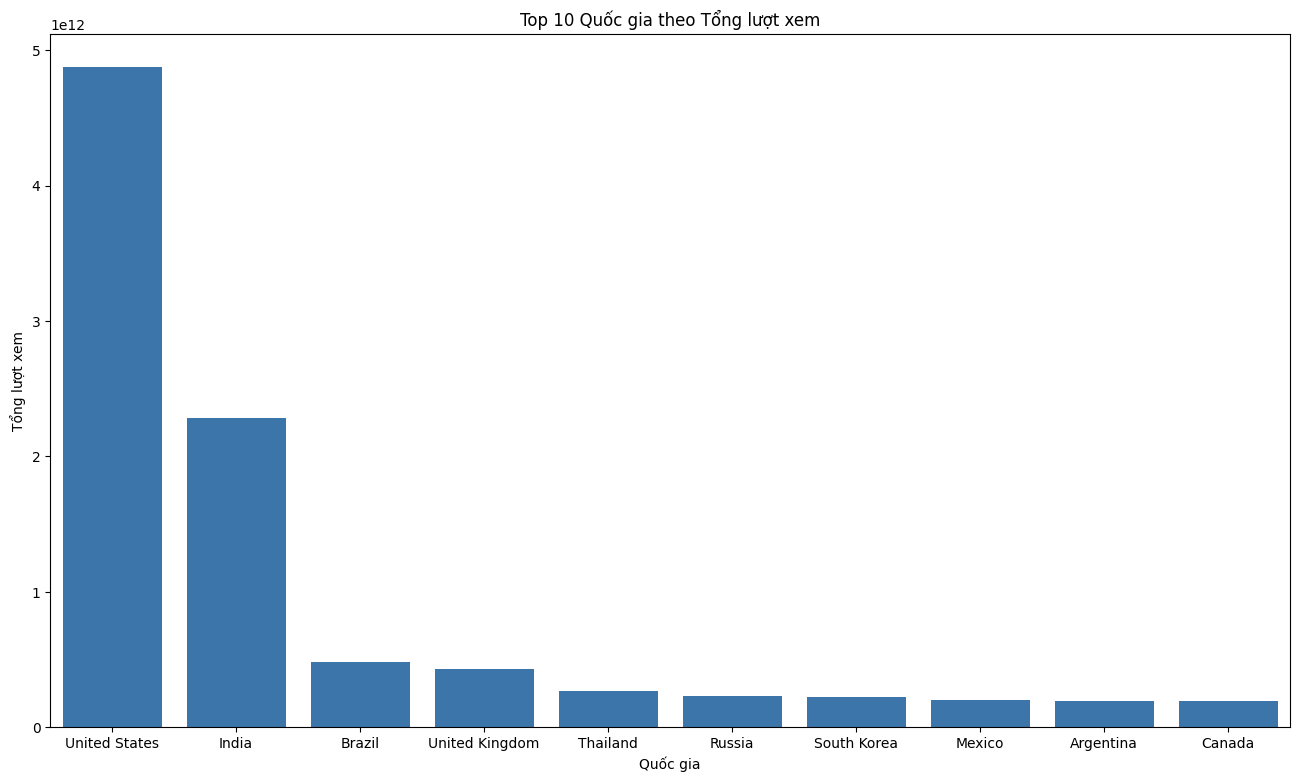

In [23]:
plt.figure(figsize=(16, 9))

# Groupby và tính tổng lượt xem cho từng quốc gia, sắp xếp theo giảm dần, và giới hạn chỉ lấy 10 dòng đầu tiên
top_countries = data.groupby(['Country'])['video views'].sum().sort_values(ascending=False).head(10).reset_index()

sns.barplot(data=top_countries,
            x='Country', y='video views',
            ci=False, color=sns.xkcd_rgb['bluish'])

plt.title('Top 10 Quốc gia theo Tổng lượt xem')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng lượt xem')
plt.show()

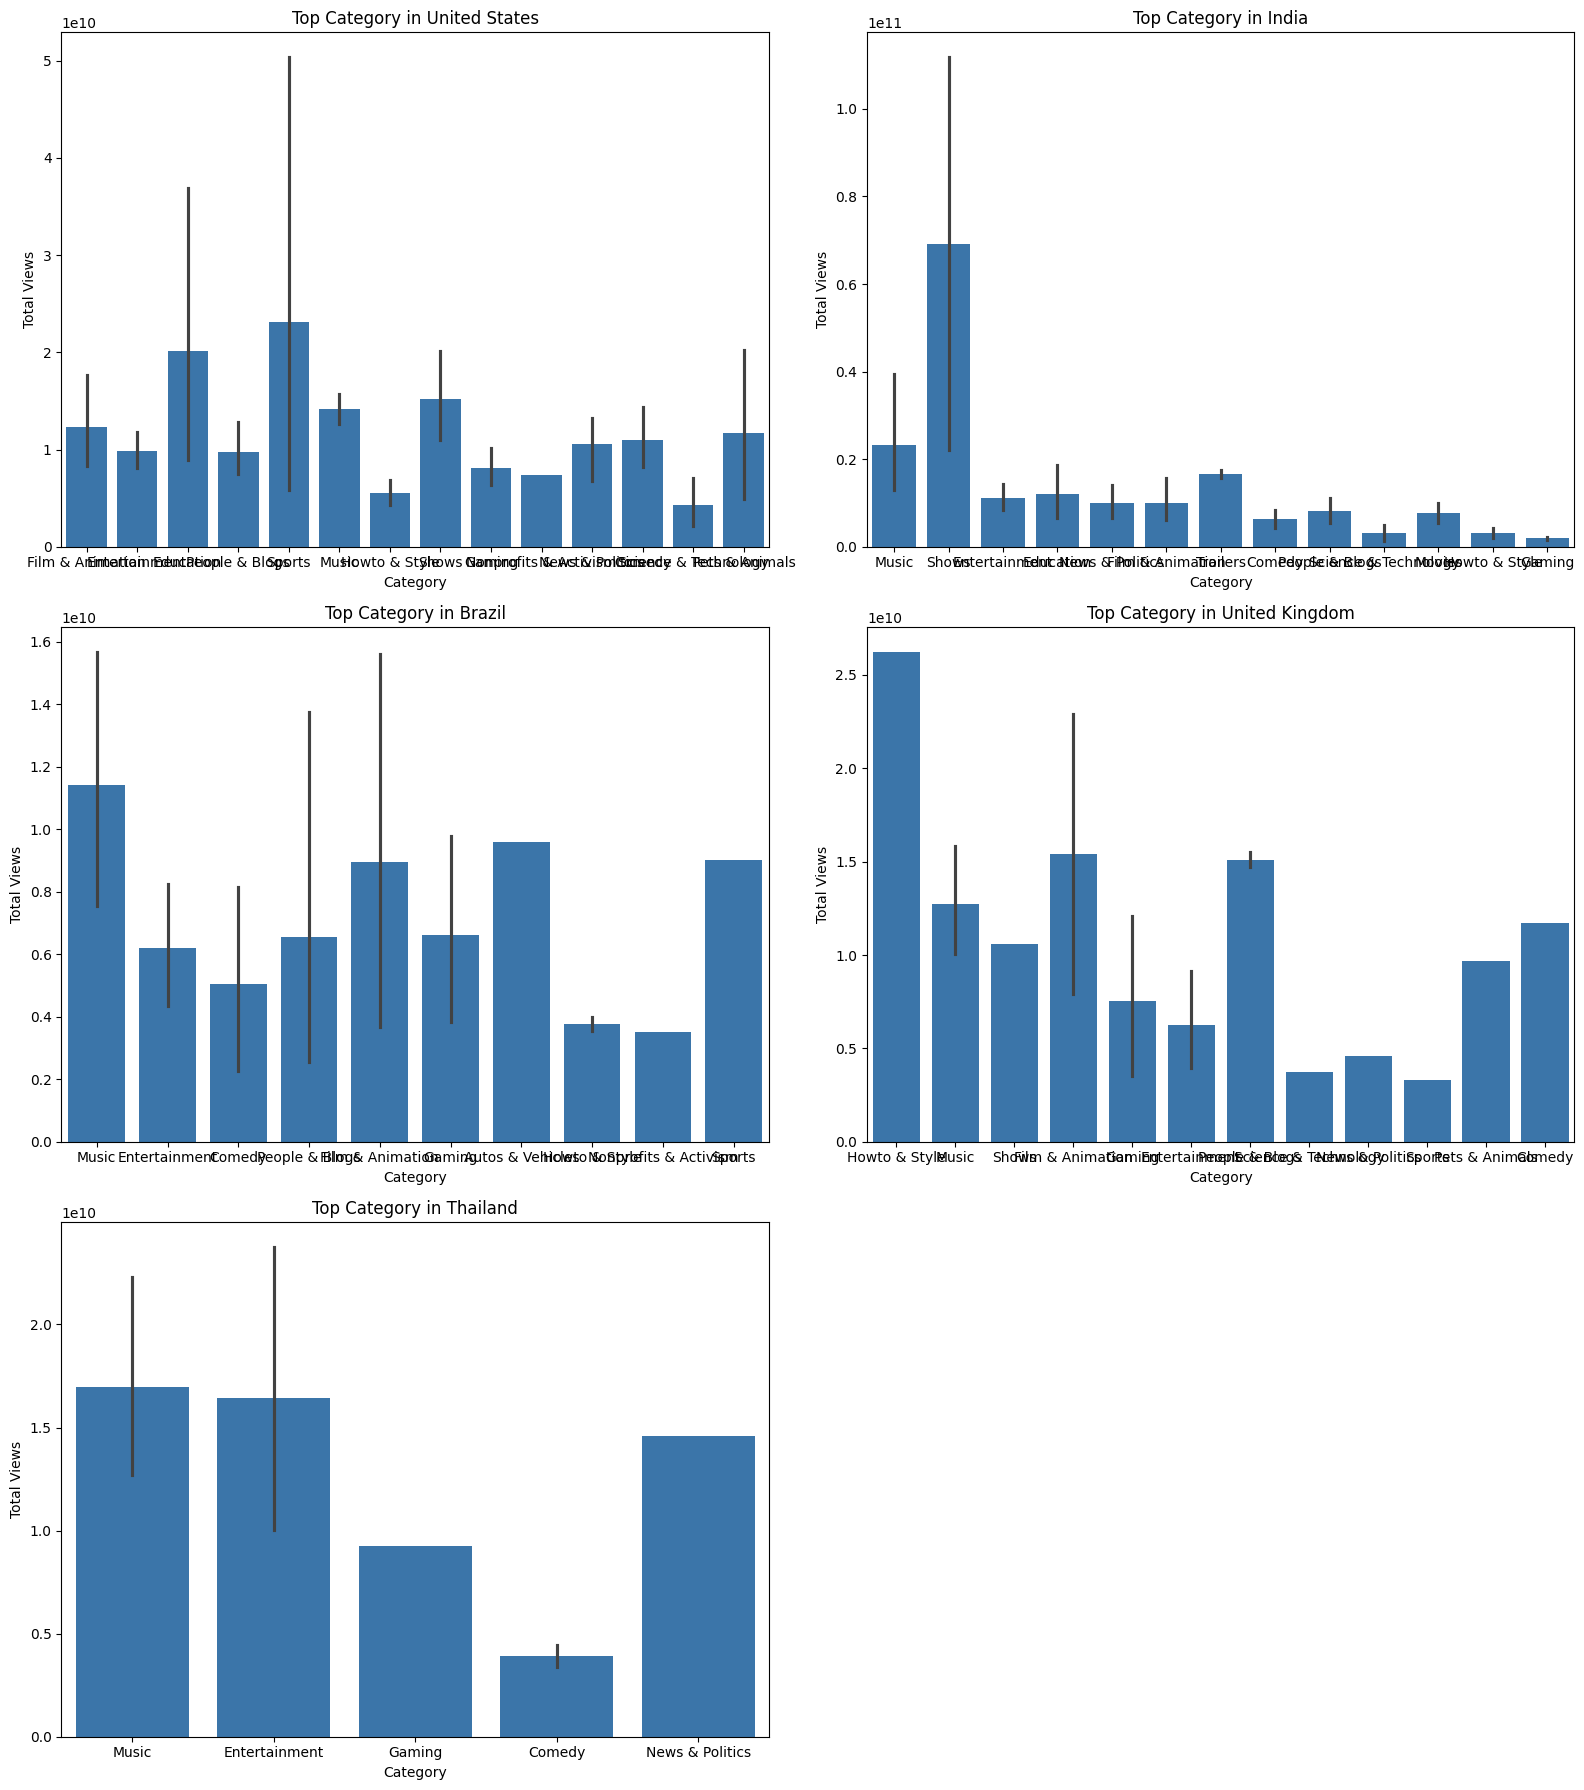

In [24]:
top_countries = data.groupby(['Country'])['video views'].sum().sort_values(ascending=False).head(5).index

# Vẽ 5 biểu đồ tương ứng với 5 quốc gia
plt.figure(figsize=(16, 18))

for i, country in enumerate(top_countries,1):
    # Lọc dữ liệu cho từng quốc gia
    country_data = data[data['Country'] == country]
    
    # Lấy thể loại được xem nhiều nhất ở quốc gia đó
    top_category = country_data.groupby(['category'])['video views'].sum().idxmax()
    
    # Vẽ biểu đồ
    plt.subplot(3, 2, i)
    sns.barplot(data=country_data,
                x='category', y='video views',
                color=sns.xkcd_rgb['bluish'])
    plt.title(f'Top Category in {country}')
    plt.xlabel('Category')
    plt.ylabel('Total Views')

plt.tight_layout()
plt.show()

#### 📚 Câu 2: 

Step 1:

In [25]:
countries_languages = {}

for ab in data['Abbreviation'].unique():
    country_identifier = 'und_'+ab
    country_language = Locale.parse(country_identifier).language
    countries_languages[ab] = country_language
    
    
data['country language'] = data['Abbreviation'].replace(countries_languages)

Step 2:

In [26]:
views_per_language = data.groupby(['country language'])['video views'].sum().sort_values(ascending = False).reset_index()
views_per_language['percentage'] = views_per_language['video views']/views_per_language['video views'].sum()

Step 3:

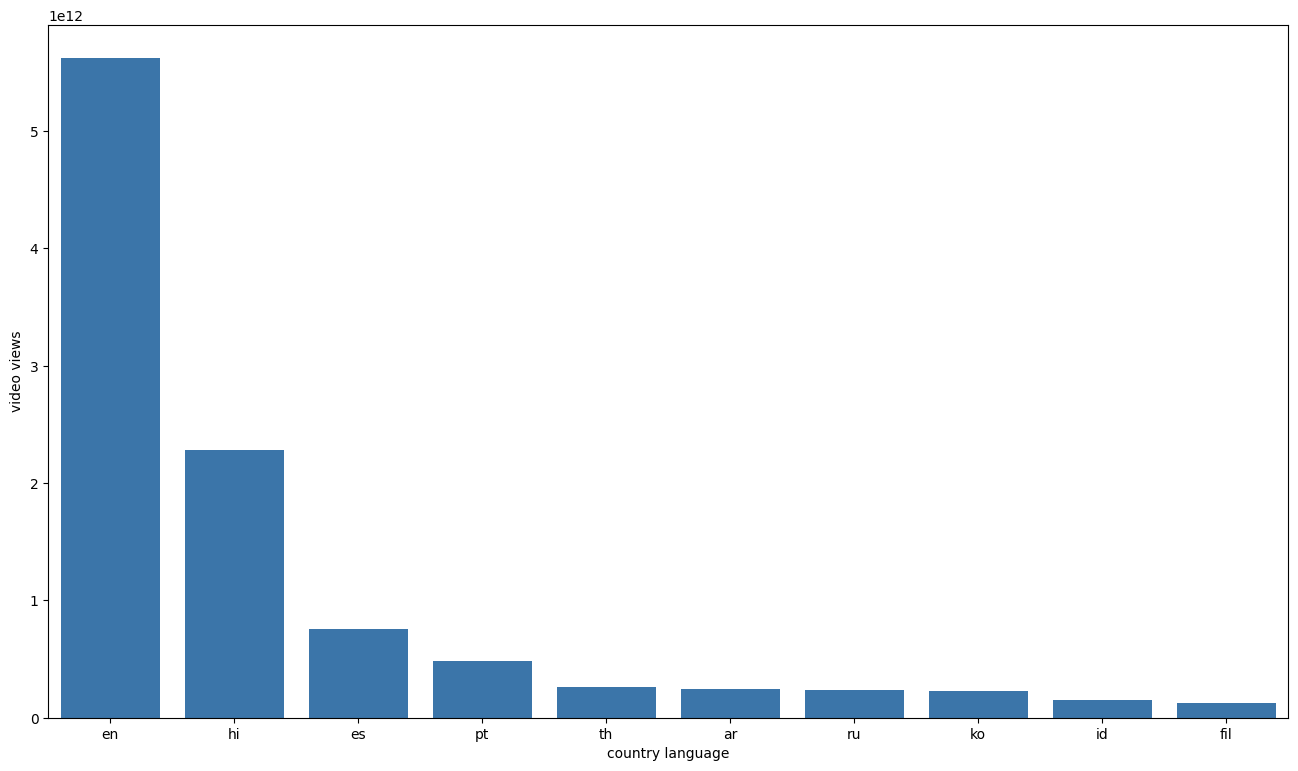

In [27]:
plt.figure(figsize = (16,9))

top_languages = data.groupby(['country language'])['video views'].sum().sort_values(ascending=False).head(10).reset_index()

sns.barplot(data=top_languages,x='country language', y='video views', color=sns.xkcd_rgb['bluish'])


plt.show();

#### 📚 Câu 3: 

Step 1:

In [28]:
data['mean earnings'] = (data['highest_monthly_earnings']+data['lowest_monthly_earnings'])/2

Step 2:

In [29]:
earnings_per_cat = data.groupby(['category'])['mean earnings'].sum().reset_index().sort_values('mean earnings', ascending = False)

Step 3:

C:\Users\Admin\AppData\Local\Temp\ipykernel_20156\4000831241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=earnings_per_cat, x='mean earnings', y='category', palette='viridis')


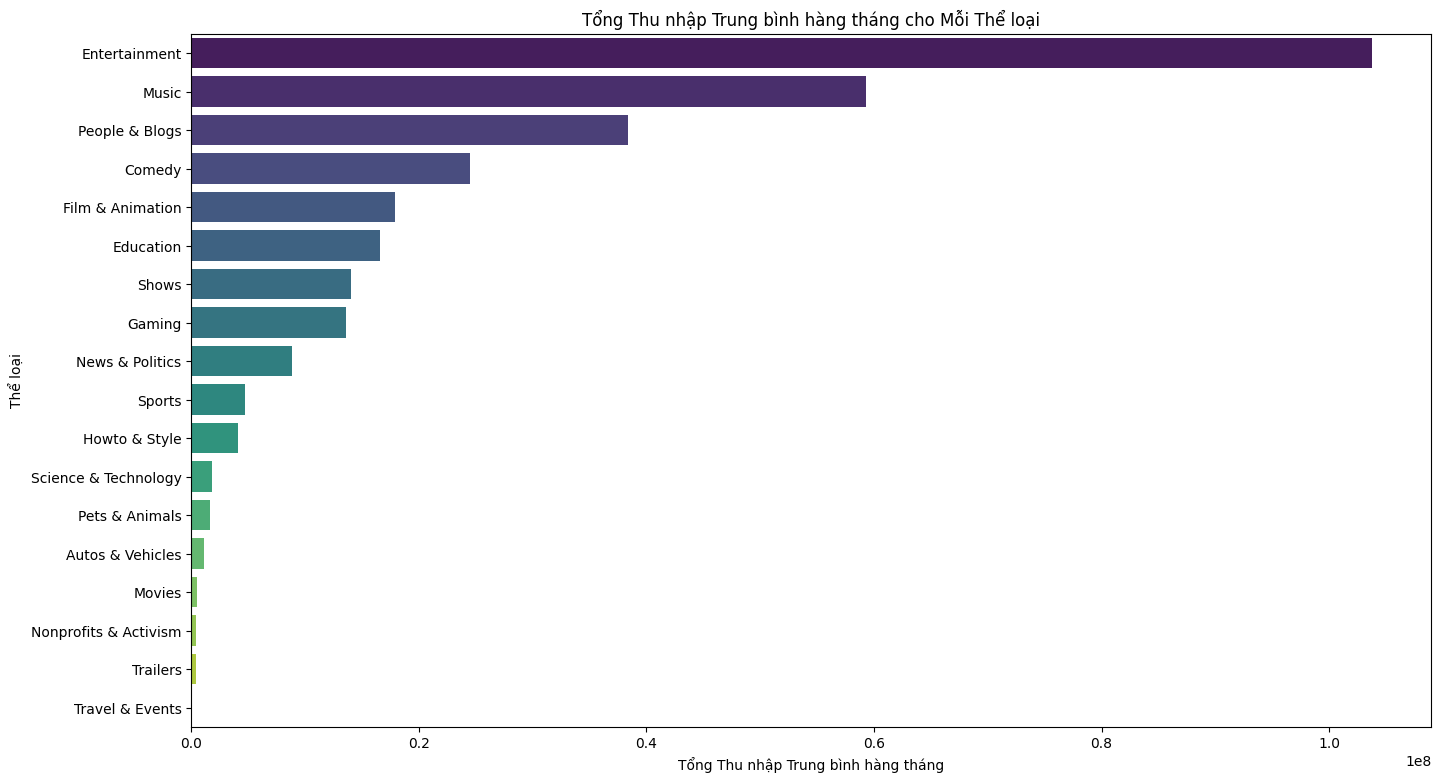

In [30]:
plt.figure(figsize=(16, 9))
sns.barplot(data=earnings_per_cat, x='mean earnings', y='category', palette='viridis')
plt.title('Tổng Thu nhập Trung bình hàng tháng cho Mỗi Thể loại')
plt.xlabel('Tổng Thu nhập Trung bình hàng tháng')
plt.ylabel('Thể loại')
plt.show()

#### 📚 Câu 4: 

Tiền xử lý

In [31]:
data['created_year'] = data['created_year'].astype(int)
convert_month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
month = data['created_month'].map(convert_month)

Bước 1: Tính lượt xem trung bình các tháng và so sánh

In [32]:
number_of_months = (2023 - data['created_year']) * 12 + ( 12 - month )
average_monthly_views = data['video views'] / number_of_months
difference = data['video_views_for_the_last_30_days'] - average_monthly_views

Bước 2: Sắp xếp theo thứ tự và thay đổi index

In [33]:
difference.index = data['Youtuber']
result = difference.sort_values()

Bước 3: Trực quan hóa bằng biểu đồ

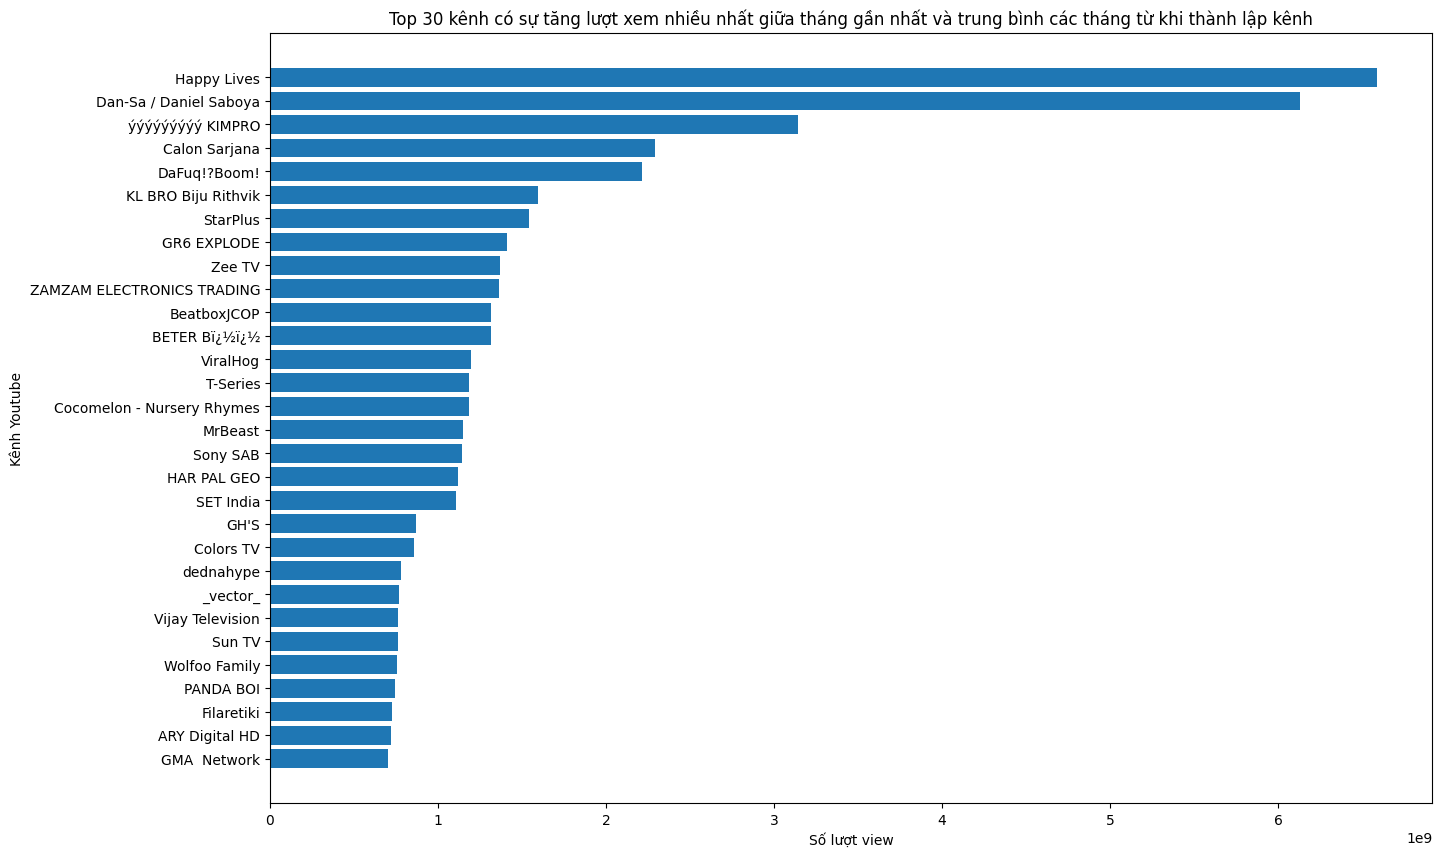

In [34]:
plt.figure(figsize=(15,10))
plt.barh(result.index[-30:], result[-30:])
plt.xlabel('Số lượt view')
plt.ylabel('Kênh Youtube')
plt.title('Top 30 kênh có sự tăng lượt xem nhiều nhất giữa tháng gần nhất và trung bình các tháng từ khi thành lập kênh');

#### 📚 Câu 5:

Bước 1: Tính số lượng view cần thiết

In [35]:
country_by_category = data.groupby(['category', 'Country'])['video_views_for_the_last_30_days'].sum()
category = data.groupby(['category'])['video_views_for_the_last_30_days'].sum()
ratio = country_by_category / category * 100

Bước 2: Chuyển kiểu dữ liệu và xử lý np.nan

In [36]:
ratio = ratio.unstack('Country')
ratio.fillna(0, inplace=True)

Bước 3: Trực quan bằng biểu đồ

NameError: name 'z' is not defined

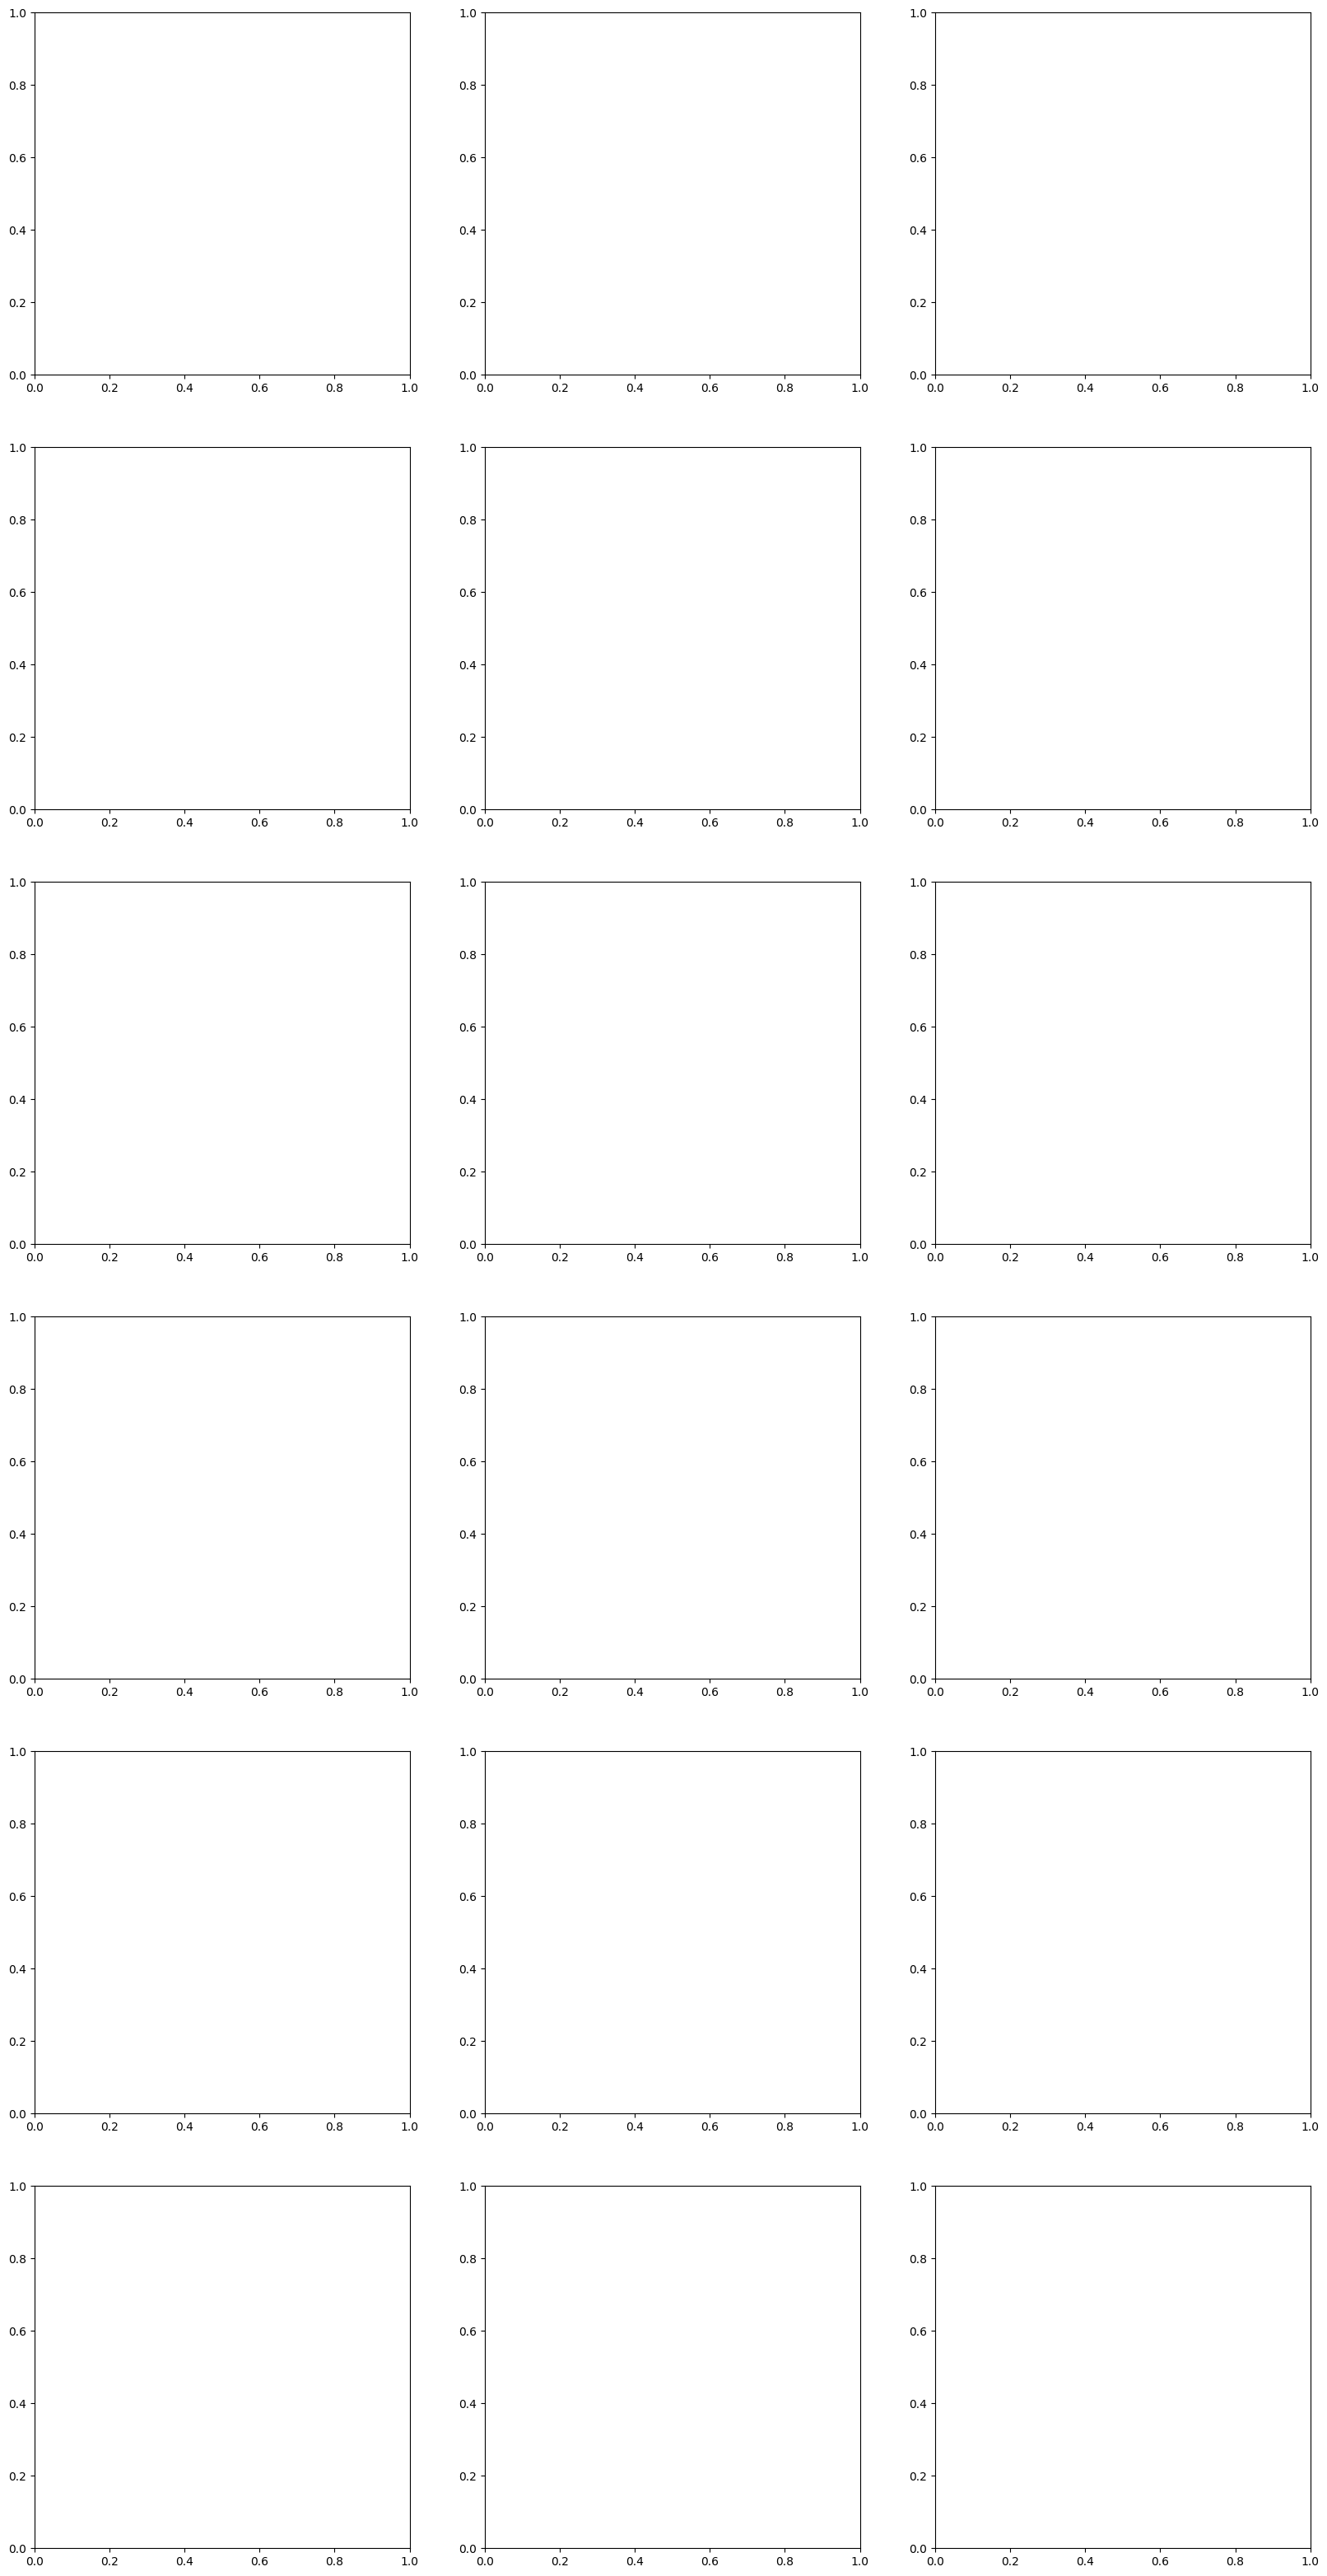

In [37]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 40))
# Draw each subplot 
for i in range(6):
    for j in range(3):
        non_zero_columns = [k for k in z.columns if z.iloc[i*3+j, ratio.columns.get_loc(k)] != 0]
        axes[i,j].pie(z.loc[ratio.index[i*3+j], non_zero_columns], startangle=90, autopct='', rotatelabels=True)
        axes[i,j].legend(labels=non_zero_columns, prop={'size': 8.2}, loc="lower right", bbox_to_anchor=(0.1, 0))

### **5. Nhìn lại quá trình làm đồ án**

### **6. Tài liệu tham khảo**